# Batch Gradient Descent Example

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch import tensor
import pandas as pd
import numpy as np

In [2]:
def load_data():
    link = "https://www.dropbox.com/s/0rjqoaygjbk3sp8/bostonhouseprices3features.txt?dl=1"
    data = np.genfromtxt(link, delimiter=',', skip_header=1)
    # Convert input and target to tensors
    inputs = data[:, [0,1,2]]
    inputs = inputs.astype(np.float32)
    inputs = torch.from_numpy(inputs)

    target = data[:, 3]
    target = target.astype(np.float32)
    target = torch.from_numpy(target)


    return inputs, target.reshape(-1,1)

def add_ones(X):
    """
    Add a column of ones at the left hand side of matrix X
    X: (N, d) tensor
    Returns
        (N, d+1) tensor
    """
    ones = torch.ones((X.shape[0],1), dtype=torch.float32)
    X = torch.cat((ones, X), dim=-1)
    return X

def make_tensor(*args):
    """
    Check if arguments are tensor, converts arguments to tensor
    accepts and returns Iterables
    """
    tensors = [tensor(el) for el in args if not torch.is_tensor(el)]
    return tensors[0] if len(tensors) else tensors

In [17]:
def batch_gradient_descent(X,y,theta,alpha=0.1,max_iter=200):
    """
    X: (N, d) matrix (iterable)
    y: (N, 1) column vector (iterable)
    theta: (d,1) or (d+1,1) column vector (iterable)
    alpha: learning rate (float)
    max_iter: no. of epoch (int)
    
    Returns:
        theta: calculated bias and weights 
        cost_history: list containing losses over each epoch
        theta_history: list containing theta over each epoch
    """
    X, y = tensor(X), tensor(y)    
    assert X.shape[0] == y.shape[0], "Dimensions must fit"
    if theta.shape[0]-1 == X.shape[1]:
        X = add_ones(X)
    
    N, d = X.shape
    theta_history = []
    cost_history = []
    for i in range(max_iter):
#         print(f"Epoch: {i}")
        theta = update_theta(X,y,theta, alpha)
        cost = calc_cost(X,y,theta)
#         print (f"Loss= {cost}")
        theta_history.append(theta)
        cost_history.append(cost)
        
    return theta, cost_history, theta_history

def calc_gradient(X, y, theta):
    return X.t() @ (X@theta - y)

def update_theta(X,y,theta, alpha):
    gradient = calc_gradient(X, y, theta)
    theta_new = (theta - alpha*(gradient))
    return theta_new

def calc_cost(X, y, theta):
    """
    X: (N, d) tensor
    y: (N, 1) tensor
    theta: (d, 1) or (d+1, 1) tensor
    
    Returns Mean Squared Error
    """
    if theta.shape[0]-1 == X.shape[1]:
        X = add_ones(X)
    y_pred = X@theta
    return ((y_pred - y)**2).sum()/N  

/home/adam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


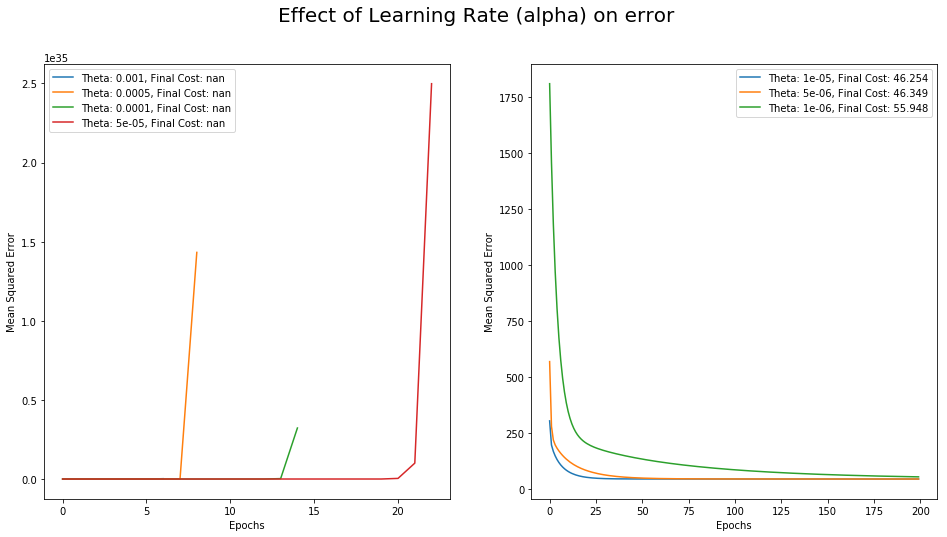

In [18]:
X, y = load_data()
N, d = X.shape
# initialize theta
theta_random = torch.randn((d+1,1))

learning_rates_fast = [0.001, 0.0005, 0.0001, 0.00005]
learning_rates_slow = [0.00001, 0.000005, 0.000001]
all_rates = [learning_rates_fast, learning_rates_slow]
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))
fig.suptitle("Effect of Learning Rate (alpha) on error", size=20)
for i in range(2):
    learning_rates = all_rates[i]
    for alpha in learning_rates:
        _, cost_history, theta_history = batch_gradient_descent(X,y,theta_random, alpha=alpha)
        final_cost = round(cost_history[-1].item(),3)
        axes[i].plot(cost_history, label=f"Theta: {alpha}, Final Cost: {final_cost}")
        axes[i].set_ylabel("Mean Squared Error")
        axes[i].set_xlabel("Epochs")
        axes[i].legend()